In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.pyplot import figure
from wordcloud import WordCloud
import spacy
import random
from operator import itemgetter
import numpy as np
np.random.seed(42)


In [ ]:
# something something difficulty
difficulty = pkl.load(open('extra_data_dict16aug.pkl','rb'))
print(difficulty['http://codeforces.com/problemset/problem/215/D'][1])
count = 0

strings = ['Div. 1','Div. 2', 'Div. 1 + Div. 2', 'Div. 3']
for i in difficulty:
    for c in strings:
        if c in difficulty[i][1]: 
            count += 1
            break
        
print(count/len(difficulty))

In [ ]:
# list names contains list of names from http://deron.meranda.us/data/census-derived-all-first.txt
names = open('census-derived-all-first.txt').readlines()
print(names[:10])
list_names = []
for i in names:
    list_names.append(i.split()[0].lower().capitalize())
print(list_names[:10])
list_names = set(list_names)
if 'John' in list_names:
    print('a')

In [13]:
data = pkl.load(open('dataset_26aug.pkl','rb'))

In [ ]:
print(len(data))
data25aug = manually_remove_problems(data)
print(len(data25aug))
pkl.dump(data25aug, open('dataset_26aug.pkl','wb'))
print(len(data25aug))
print(data25aug['http://codeforces.com/problemset/problem/215/D'])

In [3]:
def manually_remove_problems(data):
    """ remove problem from data if it has a certain tag"""
    final_data = {}
    remove_tags = ['*special']
    remove_string1 = 'See the problem statement here:'
    remove_string2 = 'This problem was deleted from the contest, because it was used previously at another competition.'

    remove_contest = '952'
    for i in data:
        if set(data[i][1][0]).intersection(set(remove_tags)) == set():
            if data[i][0][0] != '' and remove_string1 not in data[i][0][0] and remove_string2 not in data[i][0][0]:
                if remove_contest not in i:
                    if len(data[i][1][0]) > 0:
                        final_data[i] = data[i]
    return final_data
    
def get_all_classes(data):
    '''returns a list of all classes in this dataset'''
    all_classes = set()
    for i in data:
        for cls in data[i][1][0]:
#             print(cls)
            if cls not in all_classes:
                all_classes.add(cls)
#                 print(cls, i)
    return list(all_classes)

def split_data_acc_contestid(data, contestid):
    train = {}
    test = {}
    for i in data:
        if int(i.split('/')[5]) > contestid:
            test[i] = data[i]
        else:
            train[i] = data[i]
    return train, test  

def get_single_label_problems(data):
    '''returns a dict of all problems which only have one label'''
    single_label_problems = {}
    for i in data:
        if len(data[i][1][0]) == 1:
            single_label_problems[i] = data[i]
    return single_label_problems


def get_classwise_distribution(data):
    class_count = {}
    for i in data:
        for cls in data[i][1][0]:
            if cls in class_count:
                class_count[cls] +=1 
            else:
                class_count[cls] = 1
    return class_count

def get_avg_len(data):
    avg_prob = 0.0
    avg_all = 0.0
    for i in data:
        avg_prob += len(data[i][0][2].split())
        avg_all += len(data[i][0][0].split())
    
    avg_prob /= len(data)
    avg_all /= len(data)

    return(avg_prob,avg_all)
def get_avg_no_of_classes_per_problem(data):
    avg = 0.0
    for i in data:
        avg += len(data[i][1][0])
    return avg/len(data)
    
    
def get_topk_single_label_problems(data,k):
    """ get top k by frequency single label problems"""
    class_dict = get_classwise_distribution(data)
    print(class_dict)
    class_dict = dict(sorted(class_dict.items(), key=itemgetter(1), reverse=True)[:k])
    print(set(class_dict.keys()))

    topk_data = {}
    for i in data:
        if set(data[i][1][0]).intersection(set(class_dict.keys())) != set():
            topk_data[i] = data[i]
            
    return topk_data
    
def get_topk_multi_label_problems(data,k):
    """ get top k by frequency multi label problems"""
    class_dict = get_classwise_distribution(data)
#     print(class_dict,'AA')
    class_dict = dict(sorted(class_dict.items(), key=itemgetter(1), reverse=True)[:k])
#     print(set(class_dict.keys()))

    topk_data = {}
    for i in data:
        if set(data[i][1][0]).intersection(set(class_dict.keys())) != set():
            topk_data[i] = data[i]
            topk_data[i][1][0] = list(set(data[i][1][0]).intersection(set(class_dict.keys())))
            
    return topk_data

def make_probfreq_noofclass_histogram(data):
    freq_noocclasses = {}
    for i in data:
        if len(data[i][1][0]) in freq_noocclasses:
            freq_noocclasses[len(data[i][1][0])] += 1
        else:
            freq_noocclasses[len(data[i][1][0])] = 1
            
    figure(num=None, figsize=(50, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.bar(freq_noocclasses.keys(), freq_noocclasses.values(), color='g')
    return freq_noocclasses

class_count = get_classwise_distribution(data)
print(class_count)

{'chinese remainder theorem': 9, 'games': 74, 'schedules': 5, 'brute force': 615, 'dfs and similar': 373, 'dsu': 142, 'constructive algorithms': 433, 'strings': 231, 'flows': 60, 'graph matchings': 27, 'trees': 280, 'bitmasks': 153, 'implementation': 1244, 'string suffix structures': 47, 'ternary search': 20, '2-sat': 11, 'meet-in-the-middle': 21, 'matrices': 59, 'binary search': 364, 'math': 786, 'expression parsing': 27, 'number theory': 221, 'hashing': 85, 'combinatorics': 213, 'probabilities': 99, 'shortest paths': 98, 'fft': 24, 'two pointers': 158, 'divide and conquer': 89, 'sortings': 356, 'greedy': 762, 'dp': 803, 'graphs': 342, 'geometry': 193, 'data structures': 608}


In [114]:
# randomly remove some problems from implementation
def remove_problems_implementation(data_single):
    
    np.random.seed(42)
    
    count = 0
    implementation_problems = {}
    for i in data_single:
        if data[i][1][0][0] == 'implementation':
            implementation_problems[i] = data_single[i]
    print(len(implementation_problems))
            
    implementation_problems = np.array(list(implementation_problems.keys()))
    np.random.shuffle(np.array(implementation_problems))
    implementation_problems = implementation_problems[:150]
    
    return_dict = {}
    
    for i in data_single:
        if data[i][1][0][0] != 'implementation':
            return_dict[i] = data_single[i]
            
    for i in implementation_problems:
        return_dict[i] = data_single[i]
    return return_dict
            


In [117]:
# TAKE DATA
# TAKE TOP 20 MULTIlabel
# take top10 single label etc
data = pkl.load(open('dataset_26aug.pkl','rb'))
top20multi = get_topk_multi_label_problems(data,20)
print(len(top20))

single = get_single_label_problems(top20multi)
print(len(single))

print('AAAAA')
single10 = get_topk_single_label_problems(single,5)
print(len(single10))
print(get_classwise_distribution(single10))
# print(remove_problems_implementation(single10))
single5 = remove_problems_implementation(single10)
print(get_classwise_distribution(single5))
pkl.dump(single5, open('5single_26aug.pkl','wb'))
print('AAAAA')

single10 = get_topk_single_label_problems(single,10)
print(len(single10))
print(get_classwise_distribution(single10))
pkl.dump(single10, open('10single_26aug.pkl','wb'))


3960
1309
AAAAA
{'binary search': 24, 'number theory': 18, 'math': 132, 'greedy': 121, 'data structures': 110, 'probabilities': 8, 'dp': 144, 'constructive algorithms': 64, 'strings': 33, 'geometry': 49, 'two pointers': 8, 'trees': 8, 'sortings': 26, 'dfs and similar': 36, 'brute force': 65, 'combinatorics': 19, 'bitmasks': 6, 'graphs': 31, 'implementation': 405, 'dsu': 2}
{'dp', 'math', 'implementation', 'greedy', 'data structures'}
912
{'dp': 144, 'math': 132, 'implementation': 405, 'greedy': 121, 'data structures': 110}
405
{'dp': 144, 'math': 132, 'implementation': 150, 'greedy': 121, 'data structures': 110}
AAAAA
{'binary search': 24, 'number theory': 18, 'math': 132, 'greedy': 121, 'data structures': 110, 'probabilities': 8, 'dp': 144, 'constructive algorithms': 64, 'strings': 33, 'geometry': 49, 'two pointers': 8, 'trees': 8, 'sortings': 26, 'dfs and similar': 36, 'brute force': 65, 'combinatorics': 19, 'bitmasks': 6, 'graphs': 31, 'implementation': 405, 'dsu': 2}
{'dfs and simi

In [120]:
data = pkl.load(open('dataset_26aug.pkl','rb'))
top20multi = get_topk_multi_label_problems(data,20)
print(len(top20multi))
pkl.dump(top20multi, open('20multi_26aug.pkl','wb'))


top10multi = get_topk_multi_label_problems(data,10)
print(len(top10multi))
pkl.dump(top10multi, open('10multi_26aug.pkl','wb'))


3960
3737


In [58]:
data = pkl.load(open('dataset_26aug.pkl','rb'))
d1 = get_classwise_distribution(data)
# print(d1)
class_dict = dict(sorted(d1.items(), key=itemgetter(1), reverse=True)[:20])
print(class_dict)

{'binary search': 364, 'number theory': 221, 'math': 786, 'brute force': 615, 'dfs and similar': 373, 'dsu': 142, 'dp': 803, 'probabilities': 99, 'data structures': 608, 'strings': 231, 'geometry': 193, 'two pointers': 158, 'trees': 280, 'sortings': 356, 'constructive algorithms': 433, 'greedy': 762, 'combinatorics': 213, 'bitmasks': 153, 'graphs': 342, 'implementation': 1244}


{1: 1229, 2: 1429, 3: 868, 4: 332, 5: 109, 6: 31, 7: 3, 11: 1}
{1: 1229, 2: 1429, 3: 868, 4: 332, 5: 109, 6: 31, 7: 3, 11: 1}
{1: 0.30709645177411293, 2: 0.35707146426786607, 3: 0.21689155422288856, 4: 0.08295852073963018, 5: 0.02723638180909545, 6: 0.007746126936531734, 7: 0.0007496251874062968, 11: 0.0002498750624687656}


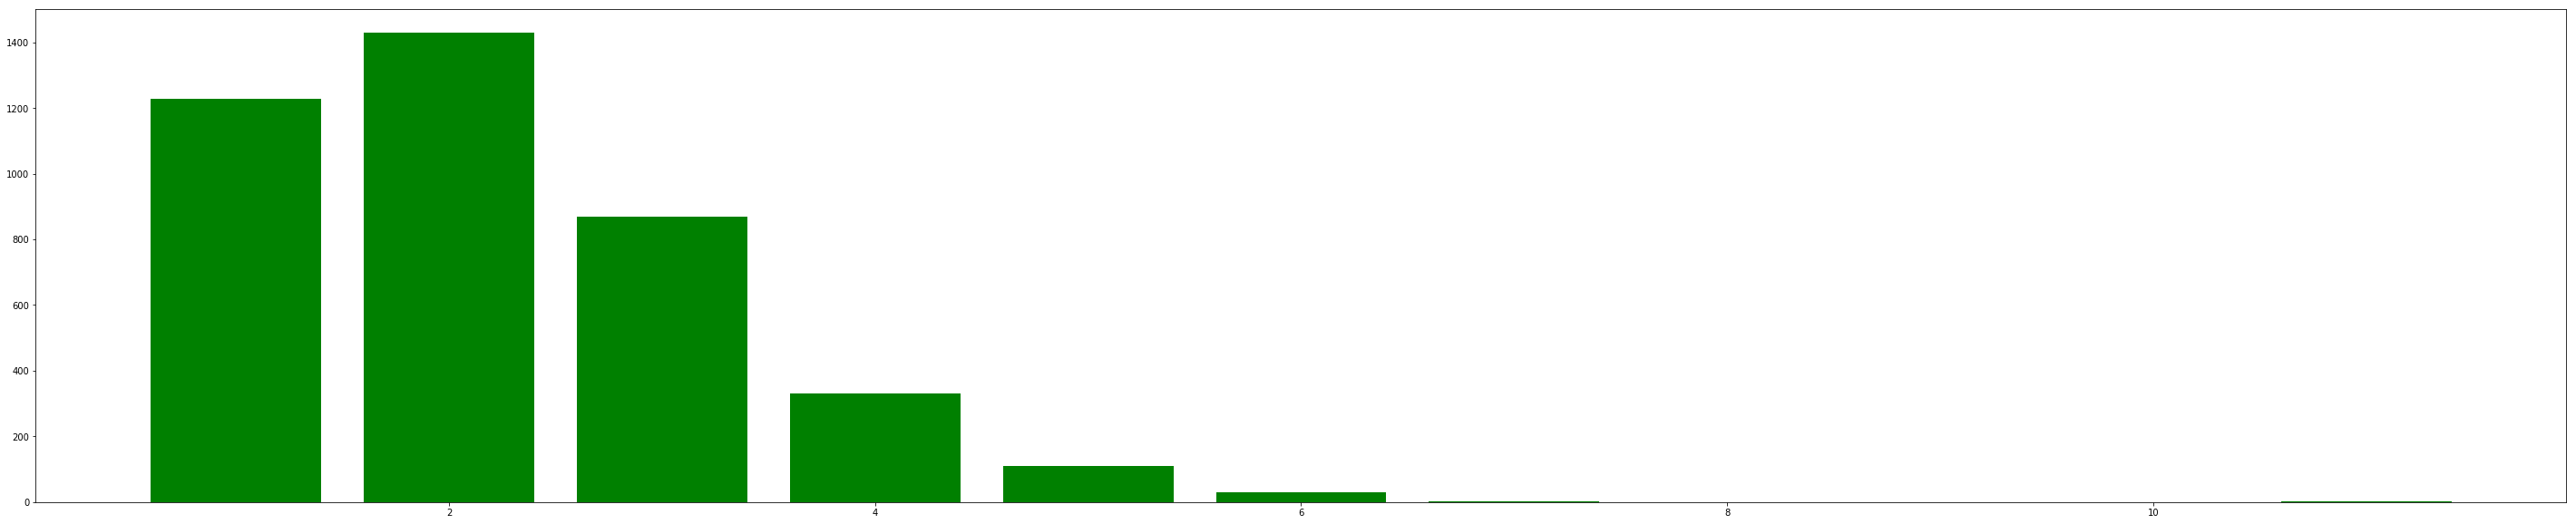

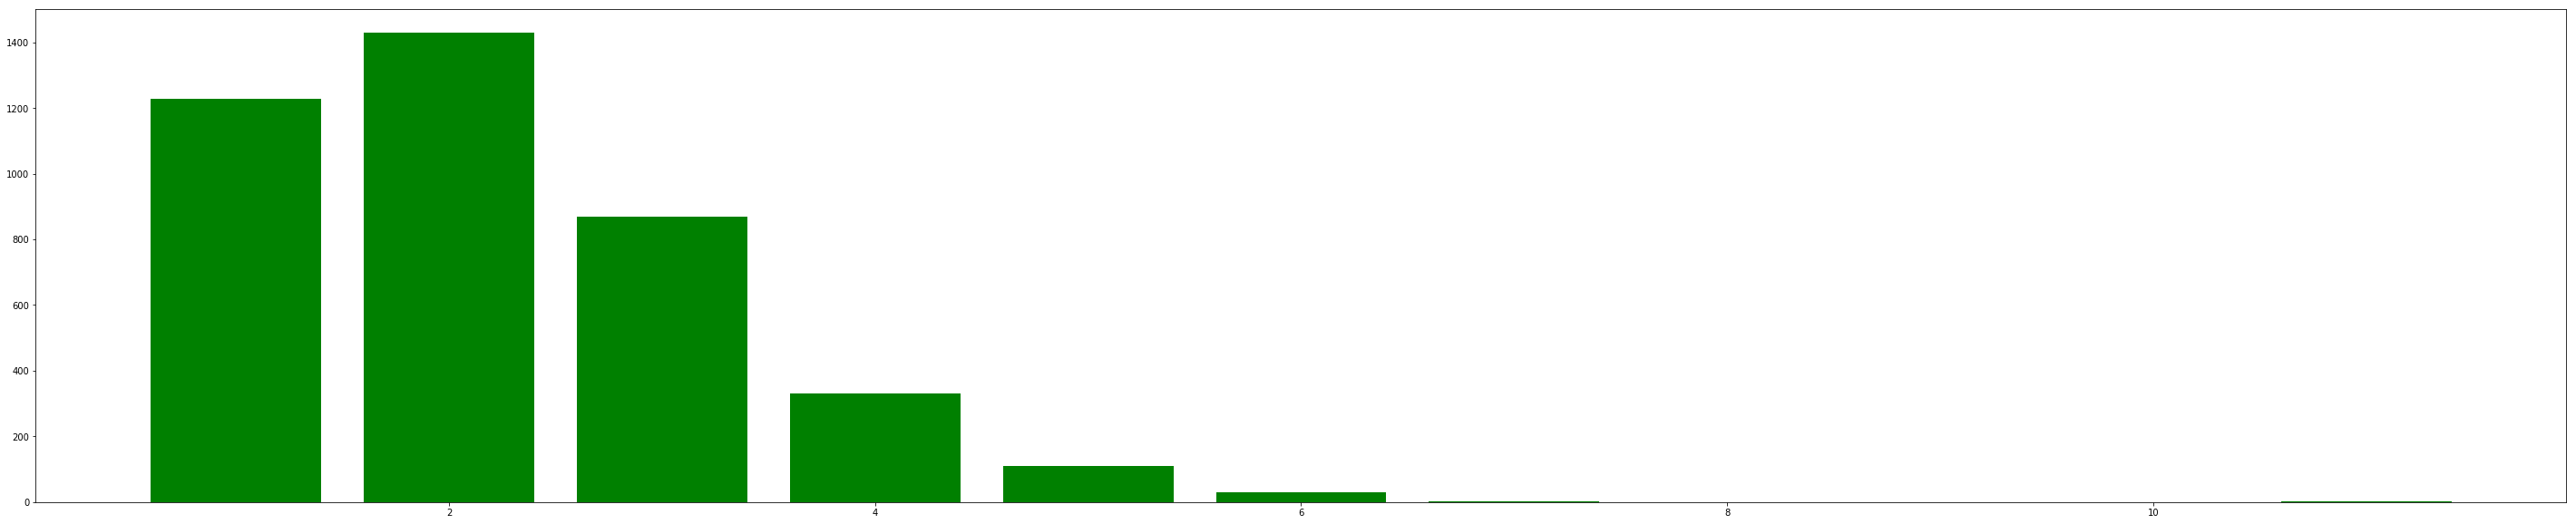

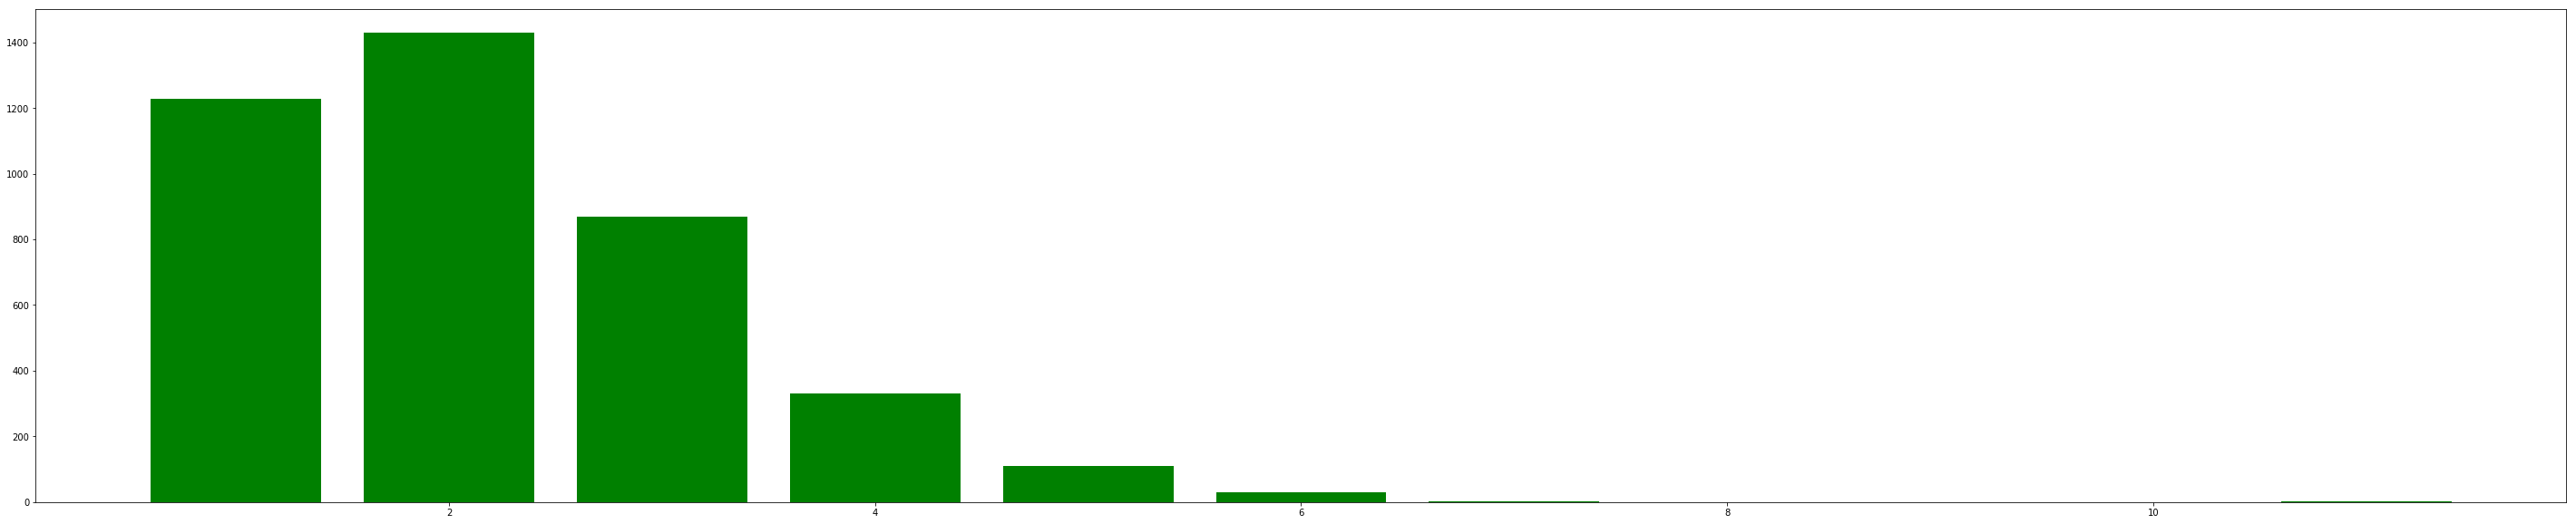

In [57]:
data = pkl.load(open('dataset_26aug.pkl','rb'))
top20 = get_topk_multi_label_problems(data,25)
print(make_probfreq_noofclass_histogram(top20))

print(make_probfreq_noofclass_histogram(top20))

d2 = make_probfreq_noofclass_histogram(top20)
print({k : val / sum(d2.values()) for k, val in d2.items()})


In [54]:
# data = manually_remove_problems(data)

print(get_avg_no_of_classes_per_problem(data))
print(len(data))
top5 = get_topk_multi_label_problems(data,5)
top10 = get_topk_multi_label_problems(data,10)
top15 = get_topk_multi_label_problems(data,15)

print(get_avg_no_of_classes_per_problem(top5))
print(get_avg_no_of_classes_per_problem(top10))
print(get_avg_no_of_classes_per_problem(top15))

print(len())
print(len(get_single_label_problems(top15)))

2.189350584722568
4019
1.3821405121470782
1.408631521442229
1.3909601634320736


TypeError: len() takes exactly one argument (0 given)

In [ ]:

top5 = get_topk_multi_label_problems(data,5)
top10 = get_topk_multi_label_problems(data,10)
top15 = get_topk_multi_label_problems(data,15)

print(get_avg_no_of_classes_per_problem(top5))
print(get_avg_no_of_classes_per_problem(top10))
print(get_avg_no_of_classes_per_problem(top15))

print(get_avg_no_of_classes_per_problem(data))

In [ ]:
# get good examples for writing in paper
data = manually_remove_problems(data)
min1 = 10000000000
min_p = ''
for i in data:
    if len(data[i][0][0].split()) < 100:
        min1 = len(data[i][0][2].split())
        min_p = data[i][0][2]
        print('a',min_p,min1,data[i][1][0],i,'b')
print(min_p,min1)



print(len(data))

In [ ]:
single_label_problems = get_single_label_problems(data)
single_label_problems = manually_remove_problems(single_label_problems)


print(len(single_label_problems))

In [ ]:
# make datasets for manual evaluation
list_problems = get_topk_multi_label_problems(single_label_problems,15)
print(len(list_problems))
list_keys = list(list_problems.keys())

single_label_maunal_eval = np.random.permutation(list_keys)[:120]
# print(len(list_keys))

In [ ]:
# make 20 warmup and 100 actual test
import pandas as pd
warmup = single_label_maunal_eval[:20]
actual_test = single_label_maunal_eval[20:]

def make_csv(links,single_label_problems):
    problem_dict ={}
    for i in links:
        problem_dict[i] = single_label_problems[i][0][0]
    return problem_dict

def make_answers(links,single_label_problems):
    problem_dict ={}
    for i in links:
        problem_dict[i] = single_label_problems[i][1][0], 
    return problem_dict

# print(make_csv(warmup,single_label_problems))

warmup_dict = make_csv(warmup,single_label_problems)
warmup_problems = pd.DataFrame.from_dict(warmup_dict, orient='index')
warmup_answers = pd.DataFrame.from_dict(make_answers(warmup,single_label_problems) , orient='index')
warmup_problems.to_csv('warmup_problems.csv')
warmup_answers.to_csv('warmup_answers.csv')


test_dict = make_csv(actual_test,single_label_problems)
test_problems = pd.DataFrame.from_dict(test_dict, orient='index')
test_problems.to_csv('test_problems.csv')



In [ ]:
# make like a histogram for class wise problem distribution

def make_class_count_histogram(data, threshhold, plot):
    class_count = {}
    for i in data:
        for cls in data[i][1][0]:
            if cls in class_count:
                class_count[cls] +=1 
            else:
                class_count[cls] = 1
    class_count_x = {}

    if plot:
        for i in class_count:
            if class_count[i] > threshhold:
                class_count_x[i] = class_count[i]

        figure(num=None, figsize=(50, 10), dpi=80, facecolor='w', edgecolor='k')
        plt.bar(class_count_x.keys(), class_count_x.values(), color='g')
    
    sum_p=0
    for i in data:
        if set(data[i][1][0]).intersection(set(list(class_count_x.keys()))) != set():
            sum_p += 1
            
    return class_count

# print('all data')
# make_class_count_histogram(data,50,1)
# train, test = split_data_acc_contestid(data, 800)
# print('all data till contest 800')
# make_class_count_histogram(train,50,1)
# print('all data after contest 800')
# make_class_count_histogram(test,50,1)

# print('all single label data')
# make_class_count_histogram(single_label_problems, 10, 1)
# train_single, test_single = split_data_acc_contestid(single_label_problems, 800)
# print('all data till contest 800')
# make_class_count_histogram(train_single,10,1)
# print('all data after contest 800')
# make_class_count_histogram(test_single,5,1)

print(make_class_count_histogram(data,200,0))



In [ ]:
# topk_data = get_topk_single_label_problems(single_label_problems,15)
# print(len(topk_data))
topk_data = get_topk_multi_label_problems(data,15)
print(len(topk_data))



In [ ]:
#find wordcloud
text = ' '.join([data[i][0][2] for i in data])


def make_wordcloud(text):
    wordcloud = WordCloud().generate(text)
    figure(num=None, figsize=(50, 10), dpi=80)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
make_wordcloud(text)

In [ ]:
# load spacy english model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# get a subset of the data somehow

print(data[list(data.keys())[0]][0][0][:10])
data_s =  nlp(data[list(data.keys())[0]][0][0])
print(set([w.label_ for w in data_s.ents]))

In [ ]:

def find_narrative_percentage(data):
    c = 0
    for index,link in enumerate(data):
        prob_s = nlp(data[link][0][2].strip().replace('\n',' ').replace('\r',' ').replace('\r',' '))
#         print(set([w.label_ for w in prob_s.ents]))
        ent_set = set([w.label_ for w in prob_s.ents])
        
        if 'PERSON' in ent_set:
            c += 1
        
#         frenchPeople = [ent for ent in prob_s.ents if ent.label_ == 'PERSON' ]
#         print([ent.sent for ent in frenchPeople])
    
    return c,len(list(data.keys()))

print(find_narrative_percentage(data))


In [ ]:
print(data['http://codeforces.com/problemset/problem/1004/D'][0][2].split('\n'))

In [ ]:
def find_people_percentage(data):
    c = 0
    for index,link in enumerate(list(data.keys())):
        for word in data[link][0][2].split():
            if word in list_names and word not in ['In','An','So','Soon']:
#                 print(word,link)
                c += 1
                break        
    return c,len(list(data.keys()))
find_people_percentage(data)
# print(list_names)

In [ ]:
keys = list(data.keys())[:100]

def print_person_in_problems(keys):
    for key in keys:
        print('A ',key, 'A')
        sentence = data[key][0][2].strip().replace('\n',' ').replace('\r',' ').replace('\r',' ')

        s = nlp(sentence)
        ent_set = set([(w.label_, w.text) for w in s.ents ])
        print(ent_set)
print_person_in_problems(keys)

In [ ]:
a = '\u2009'
print(a)

In [ ]:
4311/4353

In [ ]:
# find average size of problems


print(get_avg_len(data))
print(get_avg_len(single_label_problems))


In [ ]:
# average length of problem per class

def get_classwise_problem_length(data):
    class_size_dict = {}
    for link in data:
        for tag in data[link][1][0]:
            if tag not in class_size_dict:
                class_size_dict[tag] = [len(data[link][0][2].split()), 1]
            else:
                class_size_dict[tag][0] += len(data[link][0][2].split())
                class_size_dict[tag][1] += 1
    return class_size_dict            

def make_class_histogram(class_size_dict):
    histogram_dict = {}
    for i in class_size_dict:
        if class_size_dict[i][1] > 50:
            histogram_dict[i] = class_size_dict[i][0]*1.0/class_size_dict[i][1]
    
    figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.bar(histogram_dict.keys(), histogram_dict.values(), color='g')
    
    
class_size_dict =  get_classwise_problem_length(single_label_problems)
make_class_histogram(class_size_dict)

In [ ]:
# get cooccurence of labels
from collections import defaultdict

def get_co_occurrences(data):
    com = defaultdict(dict)
    for temp in data:
        for i in range(len(city_list)-1):
            for j in range(i+1, len(city_list)):
                w1, w2 = city_list[i], city_list[j]
                if " " + w1 + " " in temp and " " + w2 + " " in temp:
                    print(w1,w2)
                    if com[w1].get(w2) is None:
                        com[w1][w2] = 1
                    else:
                        com[w1][w2] += 1
    return com

def get_labels_of_data(data):
    labels_list = []
    for i in data:
        labels_list.append(data[i][1][0])

    return labels_list


labels = get_labels_of_data(data)    
print(get_co_occurrences(labels))

In [ ]:
# check how many problems have names present in us census

